In [1]:
from osgeo import gdal, gdalconst
from osgeo.gdalconst import *
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [2]:
img_path = './FinalQ4Image.jpg'

In [3]:
ds = gdal.Open(img_path, GA_ReadOnly)

In [4]:
n_band = ds.RasterCount

In [5]:
img_width = 2448
img_height = 2448

In [6]:
img = np.zeros((img_width,img_height,n_band))
for i in range(n_band):
    band = ds.GetRasterBand(i+1)
    data = band.ReadAsArray()
    img[:,:,i] = data
data = None
band = None

In [7]:
img.shape

(2448, 2448, 3)

In [8]:
pointWater = pd.read_csv('./water_samples.csv').values
pointUrban = pd.read_csv('./urban_samples.csv').values
pointAgri = pd.read_csv('./agriculture_samples.csv').values
pointRange = pd.read_csv('./Range_samples.csv').values
pointBarren = pd.read_csv('./barren_samples.csv').values

In [9]:
def imgPointToData(img,point):
    dataOut = []
    for i in range(len(point)):
        dataOut.append(img[point[i,0],point[i,1]])
    return np.array(dataOut)

In [10]:
dataWater = imgPointToData(img,pointWater)
dataUrban = imgPointToData(img,pointUrban)
dataAgri = imgPointToData(img,pointAgri)
dataRange = imgPointToData(img,pointRange)
dataBarren = imgPointToData(img,pointBarren)

In [11]:
X_train = np.concatenate((dataWater[:8000],dataUrban[:8000],dataAgri[:8000],dataRange[:8000],dataBarren[:8000]))
y_train = np.ones((len(X_train)))
y_train[:8000] *= 0
y_train[8000:40000] *= 1


X_test = np.concatenate((dataWater[8000:],dataUrban[8000:],dataAgri[8000:],dataRange[8000:],dataBarren[8000:]))
y_test = np.ones((len(X_test)))
y_test[:2000] *= 0
y_test[2000:10000] *= 1

In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(40000, 3)
(40000,)
(10000, 3)
(10000,)


In [13]:
idx1 = np.random.permutation(len(X_train))
X_train = X_train[idx1]
y_train = y_train[idx1]

idx2 = np.random.permutation(len(X_test))
X_test = X_test[idx2]
y_test = y_test[idx2]

X_train = X_train/255
X_test = X_test/255

In [14]:
import sklearn
import xgboost as xgb

In [15]:
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold

In [16]:
xgbc = xgb.XGBClassifier(max_depth=15,n_estimators=200,learning_rate=0.05)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [17]:
print(classification_report(y_test,xgbc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      2000
         1.0       0.99      0.99      0.99      8000

    accuracy                           0.98     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.98      0.98      0.98     10000



In [20]:
X_train2 = np.concatenate((dataUrban[:8000],dataAgri[:8000],dataRange[:8000],dataBarren[:8000]))
y_train2 = np.ones((len(X_train2)))
y_train2[:8000] *= 0
y_train2[8000:16000] *= 1
y_train2[16000:24000] *= 2
y_train2[24000:36000] *= 3


X_test2 = np.concatenate((dataUrban[8000:],dataAgri[8000:],dataRange[8000:],dataBarren[8000:]))
y_test2 = np.ones((len(X_test2)))
y_test2[:2000] *= 0
y_test2[2000:4000] *= 1
y_test2[4000:6000] *= 2
y_test2[6000:8000] *= 3


idx1 = np.random.permutation(len(X_train2))
X_train2 = X_train2[idx1]
y_train2 = y_train2[idx1]

idx2 = np.random.permutation(len(X_test2))
X_test2 = X_test2[idx2]
y_test2 = y_test2[idx2]

X_train2 = X_train2/255
X_test2 = X_test2/255

print(X_train2.shape)
print(y_train2.shape)
print(X_test2.shape)
print(y_test2.shape)

(32000, 3)
(32000,)
(8000, 3)
(8000,)


In [15]:
xgbc2 = xgb.XGBClassifier(max_depth=15,n_estimators=200,learning_rate=0.05)
xgbc2.fit(X_train2,y_train2)

NameError: name 'xgb' is not defined

In [21]:
print(classification_report(y_test2,xgbc2.predict(X_test2)))

              precision    recall  f1-score   support

         0.0       0.65      0.50      0.56      2000
         1.0       0.54      0.51      0.52      2000
         2.0       0.54      0.65      0.59      2000
         3.0       0.72      0.77      0.75      2000

    accuracy                           0.61      8000
   macro avg       0.61      0.61      0.61      8000
weighted avg       0.61      0.61      0.61      8000



In [18]:
from tensorflow import keras

C:\Users\Lay\Anaconda3\envs\ai\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Lay\Anaconda3\envs\ai\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Lay\Anaconda3\envs\ai\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Lay\Anaconda3\envs\ai\lib\site-packages\tensorflow\python\framework\dtypes.py:5

In [21]:
#y_train_encode = keras.utils.to_categorical(y_train)
#y_test_encode = keras.utils.to_categorical(y_test)
y_train_encode2 = keras.utils.to_categorical(y_train2)
y_test_encode2 = keras.utils.to_categorical(y_test2)

In [22]:
def nnmodel(input_shape):
    X_input = keras.layers.Input((input_shape))
    X = keras.layers.Dense(1024,activation='relu')(X_input)
    X = keras.layers.Dense(128,activation='relu')(X)
    X = keras.layers.Dense(1,activation='sigmoid')(X)
    model = keras.models.Model(inputs=X_input, outputs=X, name='model')
    return model

In [23]:
mymodel = nnmodel(X_train[0].shape)
mymodel.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])
mymodel.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
dense (Dense)                (None, 1024)              4096      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 135,425
Trainable params: 135,425
Non-trainable params: 0
_________________________________________________________________


In [26]:
mymodel.fit(X_train,y_train,batch_size=32,epochs=20,validation_data=(X_test,y_test))

Train on 40000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
40000/40000 [==============================] - 7s 167us/sample - loss: 0.0944 - acc: 0.9631 - val_loss: 0.0636 - val_acc: 0.9750
Epoch 2/20
40000/40000 [==============================] - 5s 130us/sample - loss: 0.0599 - acc: 0.9787 - val_loss: 0.0564 - val_acc: 0.9801
Epoch 3/20
40000/40000 [==============================] - 5s 128us/sample - loss: 0.0543 - acc: 0.9809 - val_loss: 0.0510 - val_acc: 0.9810
Epoch 4/20
40000/40000 [==============================] - 5s 133us/sample - loss: 0.0523 - acc: 0.9818 - val_loss: 0.0521 - val_acc: 0.9820
Epoch 5/20
40000/40000 [==============================] - 5s 129us/sample - loss: 0.0523 - acc: 0.9815 - val_loss: 0.0504 - val_acc: 0.9827
Epoch 6/20
40000/40000 [==============================] - 5s 135us/sample - loss: 0.0506 - acc: 0.9815 - val_loss: 0.0517 - val_acc: 0.9823
Epoch 7/20
40000/40000 [==============================] - 5s 1

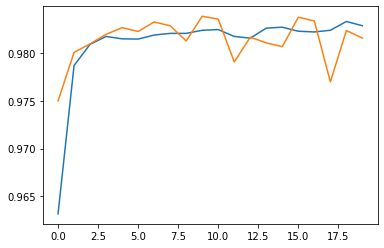

In [27]:
his = mymodel.history.history
plt.plot(his['acc'])
plt.plot(his['val_acc'])

In [37]:
pred = mymodel.predict(X_test)
pred = np.round(pred)

In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95      2000
         1.0       0.98      1.00      0.99      8000

    accuracy                           0.98     10000
   macro avg       0.98      0.96      0.97     10000
weighted avg       0.98      0.98      0.98     10000



In [39]:
def nnmodel2(input_shape):
    X_input = keras.layers.Input((input_shape))
    X = keras.layers.Dense(1024,activation='relu')(X_input)
    X = keras.layers.Dense(512,activation='relu')(X)
    X = keras.layers.Dense(32,activation='relu')(X)
    X = keras.layers.Dense(4,activation='softmax')(X)
    model = keras.models.Model(inputs=X_input, outputs=X, name='model')
    return model

In [40]:
mymodel2 = nnmodel2(X_train2[0].shape)
mymodel2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
mymodel2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              4096      
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 32)                16416     
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 132       
Total params: 545,444
Trainable params: 545,444
Non-trainable params: 0
_________________________________________________________________


In [42]:
mymodel2.fit(X_train2,y_train_encode2,batch_size=64,epochs=40,validation_data=(X_test2,y_test_encode2))

Train on 32000 samples, validate on 8000 samples
Epoch 1/40
32000/32000 [==============================] - 3s 92us/sample - loss: 0.9871 - acc: 0.5907 - val_loss: 0.9850 - val_acc: 0.5821
Epoch 2/40
32000/32000 [==============================] - 3s 89us/sample - loss: 0.9781 - acc: 0.5959 - val_loss: 0.9718 - val_acc: 0.6006
Epoch 3/40
32000/32000 [==============================] - 3s 85us/sample - loss: 0.9728 - acc: 0.5962 - val_loss: 0.9896 - val_acc: 0.5838
Epoch 4/40
32000/32000 [==============================] - 3s 85us/sample - loss: 0.9657 - acc: 0.6039 - val_loss: 0.9695 - val_acc: 0.5965
Epoch 5/40
32000/32000 [==============================] - 3s 94us/sample - loss: 0.9647 - acc: 0.6024 - val_loss: 0.9530 - val_acc: 0.6028
Epoch 6/40
32000/32000 [==============================] - 3s 93us/sample - loss: 0.9612 - acc: 0.6032 - val_loss: 0.9479 - val_acc: 0.6061
Epoch 7/40
32000/32000 [==============================] - 3s 95us/sample - loss: 0.9510 - acc: 0.6080 - val_loss: 0.9

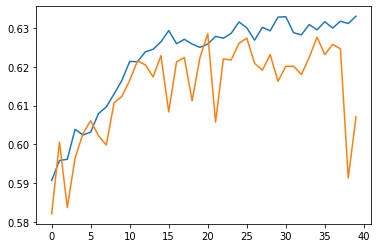

In [43]:
his2 = mymodel2.history.history
plt.plot(his2['acc'])
plt.plot(his2['val_acc'])

In [47]:
pred2 = np.argmax(mymodel2.predict(X_test2),axis=1)

In [48]:
print(classification_report(y_test2,pred2))

              precision    recall  f1-score   support

         0.0       0.65      0.50      0.56      2000
         1.0       0.47      0.70      0.57      2000
         2.0       0.62      0.46      0.53      2000
         3.0       0.76      0.77      0.76      2000

    accuracy                           0.61      8000
   macro avg       0.63      0.61      0.61      8000
weighted avg       0.63      0.61      0.61      8000



In [57]:
pred[0]

2

In [53]:
def commodel(data):
    l1 = np.round(mymodel.predict(data))
    l2 = np.argmax(mymodel2.predict(data),axis=1)
    outdata = []
    for i in range(len(data)):
        if(l1[i]==0):
            outdata.append(0)
        else:
            outdata.append(l2[i]+1)
    return np.array(outdata)

In [54]:
pred = commodel(X_test)

In [55]:
pred

array([2, 4, 2, ..., 2, 0, 0], dtype=int64)

In [56]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95      2000
         1.0       1.00      0.19      0.32      8000
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0

    accuracy                           0.34     10000
   macro avg       0.40      0.22      0.25     10000
weighted avg       1.00      0.34      0.45     10000



C:\Users\Lay\Anaconda3\envs\ai\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [57]:
img = img.reshape(((2448* 2448, 3)))
img = img/255

In [59]:
#l1 = mymodel.predict(img)

In [67]:
predimg = commodel(img)

In [68]:
#predimg_dec = np.argmax(predimg,axis=1)
#predimg_dec =medfilt(predimg_dec,kernel_size=3)
predimg_dec = predimg

In [69]:
colormap = np.zeros_like(img).astype(int)

In [70]:
for i in range(len(colormap)):
    if(predimg_dec[i] == 0):
        #water
        colormap[i] = [0,0,255]
    elif(predimg_dec[i]==1):
        #urban
        colormap[i] = [0,255,255]
    elif (predimg_dec[i] ==2):
        #argi
        colormap[i] = [255,255,0]
    elif (predimg_dec[i] == 3):
        #range
        colormap[i] = [255,0,255]
    elif (predimg_dec[i] == 4):
        #barren
        colormap[i] = [255,255,255]

In [71]:
predimg[0]

3

In [72]:
colormap = colormap.reshape((2448,2448,3))

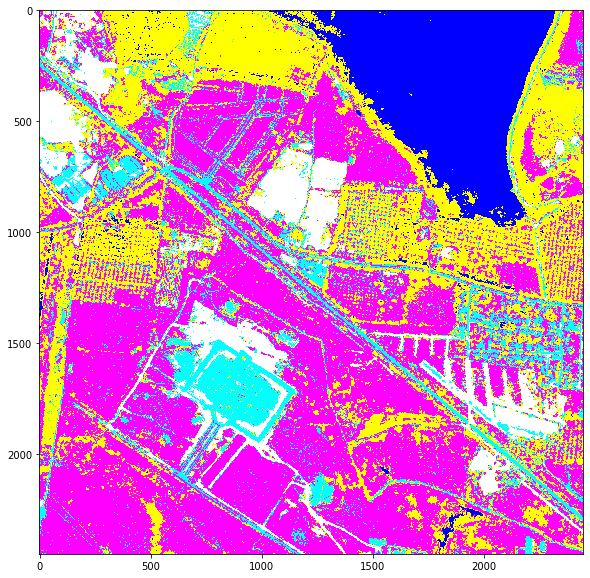

In [75]:
plt.figure(figsize=(10,10))
plt.imshow(colormap)

In [98]:
from PIL import Image

In [113]:
im = Image.fromarray(colormap.astype(np.uint8))
im.save('./final4-lcm.png')

In [77]:
from sklearn.metrics import confusion_matrix,cohen_kappa_score

In [78]:
confmat = confusion_matrix(y_test,pred)
confmat

array([[1884,    4,  111,    1,    0],
       [  11, 1060,  388,  369,  172],
       [  27,  165, 1046,  548,  214],
       [  14,  188,  329, 1310,  159],
       [   0,  201,  116,  147, 1536]], dtype=int64)

In [79]:
user_acc = [confmat[0,0],confmat[1,1],confmat[2,2],confmat[3,3],confmat[4,4]]/np.sum(confmat,axis=1)*100
user_acc

array([94.2, 53. , 52.3, 65.5, 76.8])

In [80]:
prod_acc = [confmat[0,0],confmat[1,1],confmat[2,2],confmat[3,3],confmat[4,4]]/np.sum(confmat,axis=0)*100
prod_acc

array([97.31404959, 65.51297899, 52.56281407, 55.15789474, 73.81066795])

In [81]:
overall_acc = np.sum([confmat[0,0],confmat[1,1],confmat[2,2],confmat[3,3],confmat[4,4]])/10000
overall_acc

0.6836

In [82]:
(overall_acc-1/5)/(1-1/5)

0.6044999999999999

In [83]:
cohen_kappa_score(y_test,pred)

0.6045

In [84]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.97      0.94      0.96      2000
         1.0       0.66      0.53      0.59      2000
         2.0       0.53      0.52      0.52      2000
         3.0       0.55      0.66      0.60      2000
         4.0       0.74      0.77      0.75      2000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [85]:
confmat[0]

array([1884,    4,  111,    1,    0], dtype=int64)

In [86]:
np.sum(confmat,axis=0)

array([1936, 1618, 1990, 2375, 2081], dtype=int64)